In [1]:
# preprocessing + EDA + feature scaling

In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv(r'C:\users\SHEFAT\Desktop\Linear Regression\Simple Linear Regression\student_scores.csv')

In [5]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [6]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Scores')

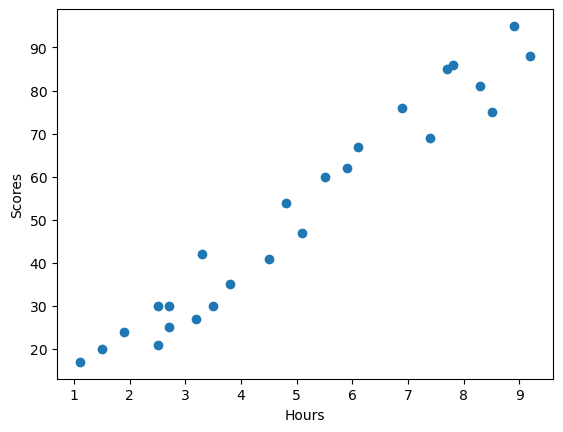

In [7]:
plt.scatter(x= df['Hours'], y=df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')

In [8]:
# Extract input and output cols

In [9]:
X = df.iloc[:, :1]
y = df.iloc[:, -1]

In [10]:
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [11]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [12]:
# Split training and test

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 22 to 12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [17]:
X_train

,Hours
22,3.8
17,1.9
24,7.8
23,6.9
14,1.1
1,5.1
10,7.7
13,3.3
8,8.3
6,9.2


In [19]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 5 to 11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   5 non-null      float64
dtypes: float64(1)
memory usage: 80.0 bytes


In [20]:
X_test

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


In [21]:
y_train

22    35
17    24
24    86
23    76
14    17
1     47
10    85
13    42
8     81
6     88
18    67
4     30
9     25
7     60
20    30
3     75
0     21
21    54
15    95
12    41
Name: Scores, dtype: int64

In [22]:
y_test

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

In [23]:
# Don't know why scaling was not required here

In [24]:
# Train the model

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
# Evaluate the model

In [29]:
y_pred = lr.predict(X_test)

In [30]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [31]:
y_test

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

In [34]:
result = pd.DataFrame({'Actual':y_test, "Predicted":y_pred})
result

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [35]:
from sklearn import metrics

In [37]:
print(f"Mean Squared Error:{metrics.mean_squared_error(y_test, y_pred)}")

Mean Squared Error:21.5987693072174


In [39]:
lr.coef_

array([9.91065648])

In [40]:
lr.intercept_

2.018160041434683

In [47]:
lr.coef_ * 1.5 + lr.intercept_

array([16.88414476])

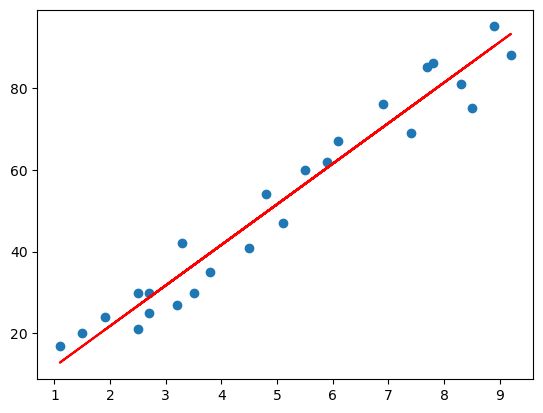

In [49]:
plt.scatter(x=df['Hours'], y=df['Scores'])
plt.plot(X_train, lr.predict(X_train), color='red')